# Projeto Integrador Final - Curso: Programação para Ciência de Dados

**Aluno:** Gisele Fonseca de Aguiar Silva  
**Data de Entrega:** 17 de Novembro de 2025, 18:00  
**Peso:** 30% da nota final

---

## <font color="red">INSTRUÇÕES - LEIA COM ATENÇÃO</font>

1. Coloque seu código nas células marcadas com `# === SEU CÓDIGO AQUI ===`
2. Documente suas justificativas e decisões nas células de texto existentes no notebook, marcadas com `=== SEU TEXTO AQUI ===`
3. **Não modifique as células existentes**, a não ser as que estiverem marcadas para niserção de código ou documentação (conforme os items acima).
4. Execute as funções de teste para verificar seu desenvolvimento. IMPORTANTE: as funções de teste não fazem parte do processo de correção. Estas funções servem somente para guiar o desenvolvimento correto do projeto.
5. Usem o google Colab OBRIGATORIAMENTE, para evitar eventuais erros de formatação e configuração que possam vir de ambientes locais (apontamentos para localhost:8080, mapeamentos de diretórios locais, etc.).
6. Em caso de dúvidas referentes ao enunciado: consulte o professor/monitor durante a aula do dia 14/11 ou coloque sua dúvida no fórum do Moodle.

### <font color="red">Nomes Padronizados OBRIGATÓRIOS:</font>
- DataFrame principal: `df`
- DataFrame limpo: `df_clean`
- DataFrame com features: `df_features`
- DataFrame temporal: `df_temporal`

### <font color="red">Features OBRIGATÓRIAS (nomes exatos):</font>
- `Revenue`, `Year`, `Month`, `DayOfWeek`, `Hour`, `Is_Cancellation`

### Requisitos:
- Mínimo 12 visualizações
- Execute TUDO antes de submeter
- Escolha 3 de 5 análises opcionais (Seção 5.2)


---
# Seção 1: Documentação e Contexto (5 pts)
---

## 1.1 Introdução


# <font color="red">=== SEU TEXTO AQUI ===</font>


O presente projeto tem como objetivo analisar o comportamento de vendas de um e-commerce de presentes e artigos decorativos ao longo do ano de 2011. O cliente, representado pela diretoria da empresa, deseja entender de forma estruturada como os produtos são vendidos, quem são seus clientes, quais itens geram maior receita, em quais períodos as vendas se intensificam e quais padrões podem indicar oportunidades ou riscos para o negócio.
Diante da grande quantidade de transações e da ausência inicial de organização e padronização nos dados, torna-se essencial aplicar técnicas de limpeza, transformação e análise de dados para extrair insights estratégicos. Esta análise visa responder diretamente às preocupações levantadas pelo CEO sobre sazonalidade, cancelamentos, desempenho dos produtos, eficiência das operações e comportamento dos clientes.
Ao final, o estudo fornecerá recomendações práticas para melhorar a receita, reduzir perdas e orientar decisões comerciais e operacionais baseadas em evidências.


## 1.2 Objetivos

Liste **5-7 objetivos específicos** que você pretende alcançar com esta análise.

**Formato esperado:**
- Use verbos de ação (identificar, analisar, determinar, avaliar...)
- Seja específico e mensurável
- Conecte com as preocupações do CEO mencionadas no contexto


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Objetivos:
1. Identificar os padrões de vendas ao longo do tempo, incluindo tendência, sazonalidade e variações significativas.
2. Avaliar quais produtos mais contribuem para receita e volume, e quais apresentam problemas recorrentes.
3. Analisar o comportamento dos clientes, frequência de compras e impacto das compras sem identificação
4. Determinar o impacto financeiro dos cancelamentos e identificar os itens mais afetados.
5. Explorar relações entre quantidade, preço, país, datas e produtos para entender drivers de receita.
6. Detectar anomalias que indiquem operações atípicas, erros ou oportunidades relevantes.
7. Gerar insights acionáveis que orientem decisões de marketing, operações e gestão de portfólio.

## 1.3 Perguntas de Negócio

Liste **5-7 perguntas específicas** que o CEO gostaria de ver respondidas.

**Formato esperado:**
- Perguntas diretas terminando em "?"
- Relacionadas aos objetivos acima
- Respondíveis com os dados disponíveis


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Perguntas:
1. Quais períodos do ano apresentam maior tendência de crescimento nas vendas?
2. Quais produtos mais geram receita e quais mais vendem em volume?
3. Qual é o perfil dos clientes mais lucrativos e qual o impacto das compras sem identificação?
4. A empresa apresenta picos de receita anormais? Eles indicam oportunidades ou problemas?
5. Há padrões de comportamento por país, dia da semana ou horário que possam ser aproveitados?

---
# Seção 2: Carregamento e Inspeção (5 pts)
---


In [3]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
%matplotlib inline

print("Bibliotecas importadas")


Bibliotecas importadas


In [4]:
# === CARREGAMENTO ===
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

# === SEU CÓDIGO AQUI ===
# Carregue o dataset em uma variável chamada 'df'
df = pd.read_excel(url)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_carregamento():
    """Valida se o dataset foi carregado corretamente."""
    try:
        # Verificar se df existe
        if 'df' not in globals():
            print("DataFrame 'df' não encontrado")
            return False

        _df = globals()['df']

        # Verificar tamanho mínimo
        if len(_df) <= 400000:
            print(f"Dataset muito pequeno: {len(_df):,} linhas (esperado: >400k)")
            return False

        # Verificar colunas essenciais
        _required = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']
        _missing = [c for c in _required if c not in _df.columns]

        if _missing:
            print(f"Colunas ausentes: {_missing}")
            return False

        print("VALIDAÇÃO PASSOU - Dataset carregado corretamente!")
        print(f"   - {len(_df):,} transações")
        print(f"   - {_df.shape[1]} colunas")
        return True

    except Exception as e:
        print(f"Erro na validação: {e}")
        return False

# Executar validação
_validar_carregamento()

VALIDAÇÃO PASSOU - Dataset carregado corretamente!
   - 541,909 transações
   - 8 colunas


True

In [6]:
# === INSPEÇÃO INICIAL ===
# Execute os comandos abaixo e DOCUMENTE suas observações em markdown

# === SEU CÓDIGO AQUI ===

# 1. Primeiras linhas (entender estrutura)
# df.head(10)

# Nas primeiras dez linhas vemos que cada InvoiceNo aparece em várias linhas, indicando que um mesmo pedido pode conter vários produtos.
# As colunas principais trazem o código e a descrição do item (StockCode, Description), a quantidade e o preço unitário (Quantity, UnitPrice),
# a data e hora da compra (InvoiceDate), além do identificador do cliente (CustomerID) e do país (Country). Nessas linhas iniciais todos os pedidos
# são de clientes do United Kingdom.


# 2. Informações sobre tipos e memória
#df.info()

# o dataset possui 541.909 registros e oito colunas. A maior parte das variáveis está completa,
# mas Description tem alguns valores ausentes e CustomerID apresenta uma quantidade significativa de nulos,
# indicando que muitos pedidos não possuem identificação de cliente. A coluna InvoiceDate já está no formato datetime,
# enquanto InvoiceNo, StockCode, Description e Country são categóricas.


# 3. Estatísticas descritivas (numéricas)
# df.describe()

# tanto Quantity quanto UnitPrice possuem valores extremos e inconsistentes. Há quantidades negativas muito altas,
# indicando cancelamentos ou ajustes, e preços unitários que variam desde valores próximos de zero até números fora do padrão,
# inclusive negativos. A mediana de Quantity é baixa, sugerindo compras pequenas por item, enquanto o desvio padrão elevado confirma forte assimetria.
# Ha necessidade de tratamento de outliers e de remoção de registros inválidos antes de avançar para análises de faturamento.

# 4. Valores faltantes por coluna
#df.isnull().sum()

#Os valores faltantes aparecem principalmente em duas colunas: Description, com pouco mais de mil ausências, e CustomerID, com mais de 135 mil registros
# sem identificação de cliente. As demais colunas estão completas. Isso indica que apenas uma parte dos pedidos possui cliente identificado,
#o que deve ser considerado em análises de comportamento ou segmentação.

# 5. Valores únicos em colunas categóricas
# df['Country'].value_counts()
df['StockCode'].nunique()


# A distribuição por país mostra uma forte concentração das vendas no Reino Unido, que representa a maior parte das transações do dataset.
# Os demais países aparecem com volumes bem menores, com Alemanha, França e Irlanda (EIRE) formando o segundo grupo mais relevante.
# Essa diferença indica que análises geográficas deverão considerar essa assimetria para evitar interpretações distorcidas,
# já que o comportamento do mercado britânico domina os resultados gerais.

# O número de códigos únicos de produto é 4.070, o que indica um portfólio bastante amplo e diversificado.




4070

### <font color="red">=== SEU TEXTO AQUI ===</font>

### Observações iniciais:
 O dataset possui 541.909 registros organizados por transações, onde cada InvoiceNo pode conter vários produtos. As colunas incluem identificadores, informações de produto, quantidade, preço e data da compra, com domínio claro do mercado do Reino Unido nas vendas. Algumas inconsistências aparecem nos dados, como quantidades e preços unitários extremamente altos ou negativos, indicando cancelamentos e ajustes que precisarão ser tratados. Também há valores ausentes em Description e, principalmente, em CustomerID, revelando que muitos pedidos não possuem identificação do cliente. Além disso, o portfólio é amplo, com 4.070 produtos distintos.

In [7]:
# === CONVERSÃO DE TIPOS (Pré-processamento Mínimo) ===
# OBRIGATÓRIO: Converter InvoiceDate para datetime
# NOTA: Embora esta seja a Seção de "Carregamento", é prática padrão
# converter tipos de data IMEDIATAMENTE após carregar, pois:
#   1. Permite análises temporais no EDA (Seção 3)
#   2. Evita erros downstream
#   3. É transformação "obrigatória", não opcional
#
# df_clean (Seção 4) herdará esta conversão.

# === SEU CÓDIGO AQUI ===

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [8]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_tipos():
    """Valida se InvoiceDate foi convertido para datetime."""
    try:
        if 'df' not in globals():
            print("DataFrame 'df' não encontrado")
            return False

        _df = globals()['df']
        _date_col = 'InvoiceDate'

        if _date_col not in _df.columns:
            print(f"Coluna '{_date_col}' não encontrada")
            return False

        _is_datetime = pd.api.types.is_datetime64_any_dtype(_df[_date_col])

        if not _is_datetime:
            print(f"'{_date_col}' deve ser datetime, atual: {_df[_date_col].dtype}")
            print("   DICA: Use pd.to_datetime(df['InvoiceDate'])")
            return False

        print("VALIDAÇÃO PASSOU - InvoiceDate é datetime!")
        print(f"   - Tipo: {_df[_date_col].dtype}")
        print(f"   - Range: {_df[_date_col].min()} a {_df[_date_col].max()}")
        return True

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_tipos()

VALIDAÇÃO PASSOU - InvoiceDate é datetime!
   - Tipo: datetime64[ns]
   - Range: 2010-12-01 08:26:00 a 2011-12-09 12:50:00


True

---
# Seção 3: Análise Exploratória - EDA (18 pts)
---

## 3.1 Análise Univariada (6 pts)
**Requisitos:** Mínimo 4 visualizações


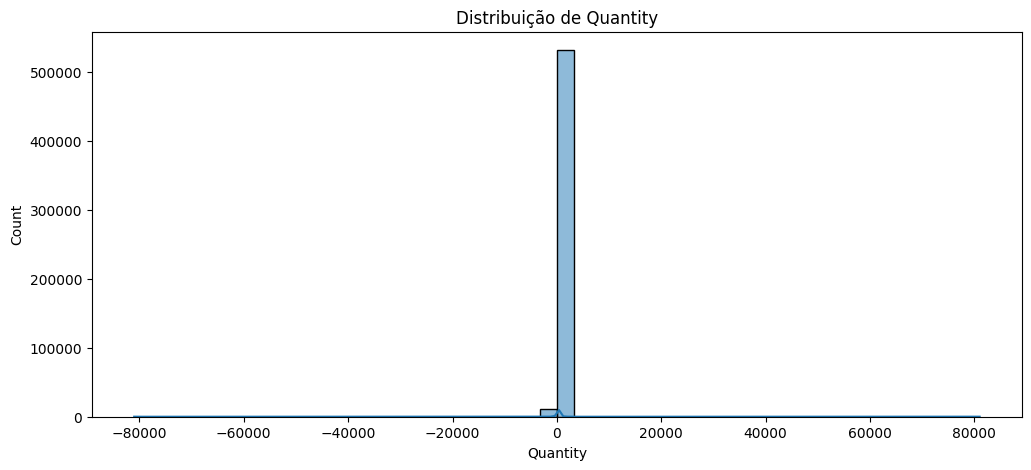

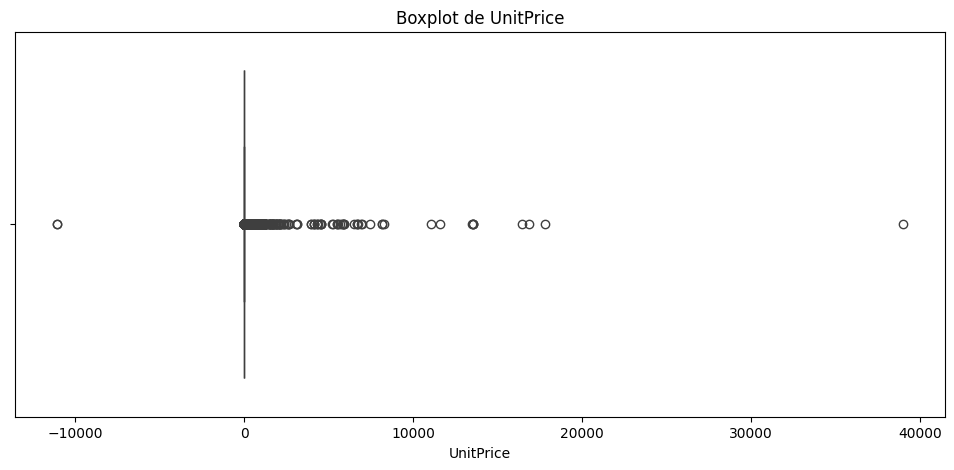

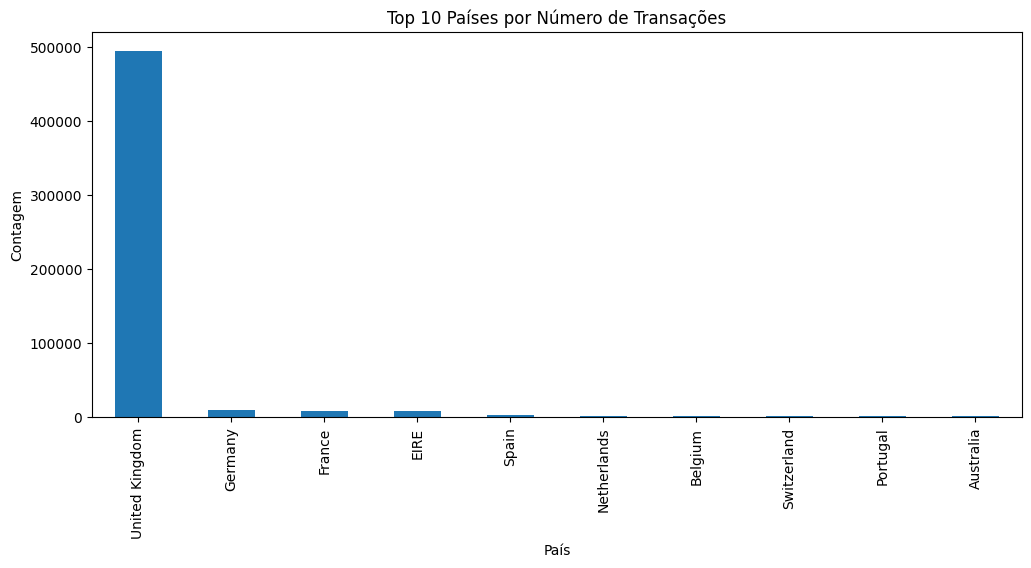

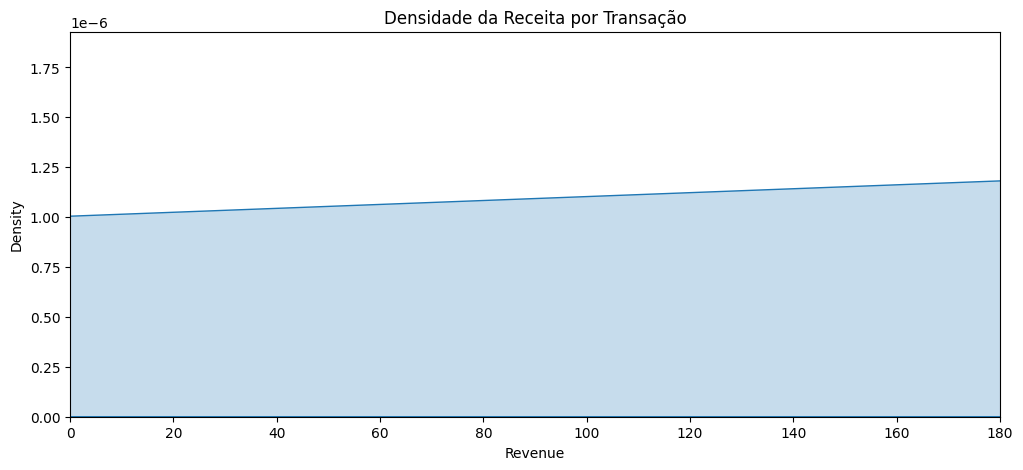

In [9]:
# === ANÁLISE UNIVARIADA ===
# Crie PELO MENOS 4 VISUALIZAÇÕES DIFERENTES para variáveis individuais

# === SEU CÓDIGO AQUI ===

#  coluna de receita
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# SUGESTÕES (escolha pelo menos 4 tipos diferentes):
# • Histograma - distribuição de Quantity, UnitPrice, Revenue
plt.figure(figsize=(12,5))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribuição de Quantity')
plt.show()


# • Boxplot - identificar outliers em variáveis numéricas
plt.figure(figsize=(12,5))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')
plt.show()

# • Barplot - top 10 produtos, top 10 países
plt.figure(figsize=(12,5))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Países por Número de Transações')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.show()

# • Countplot - frequência de cancelamentos
# • KDE plot - densidade de Revenue
plt.figure(figsize=(12,5))
sns.kdeplot(df['Revenue'], fill=True)
plt.title('Densidade da Receita por Transação')
plt.xlim(0, df['Revenue'].quantile(0.99))
plt.show()




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
A análise univariada revela que as variáveis numéricas apresentam forte assimetria e muitos outliers, especialmente Quantity e UnitPrice, com quantidades e preços negativos ou extremamente altos que indicam cancelamentos e registros incorretos. A maior parte das compras consiste em poucas unidades por item e preços baixos. A distribuição dos países mostra que as vendas são fortemente concentradas no Reino Unido, enquanto a receita por transação é baixa na maioria dos casos, com poucos valores elevados formando uma cauda longa. Esses padrões reforçam a importância de uma etapa robusta de limpeza antes de qualquer modelagem.


## 3.2 Análise Bivariada (7 pts)
**Requisitos:** Mínimo 4 visualizações


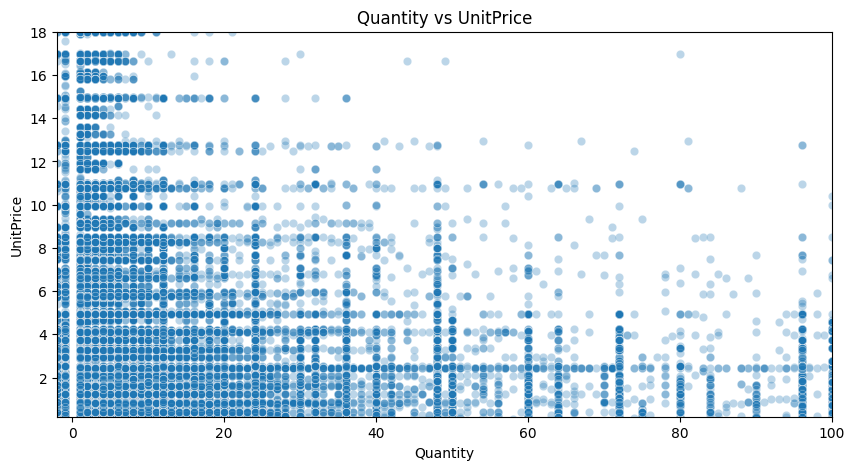

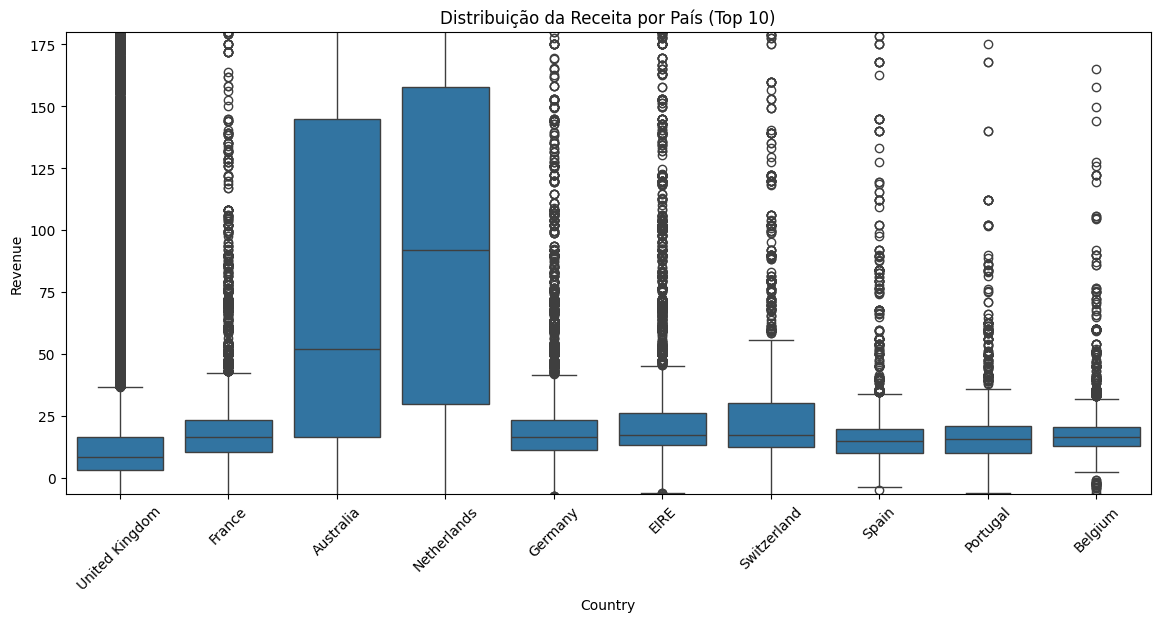

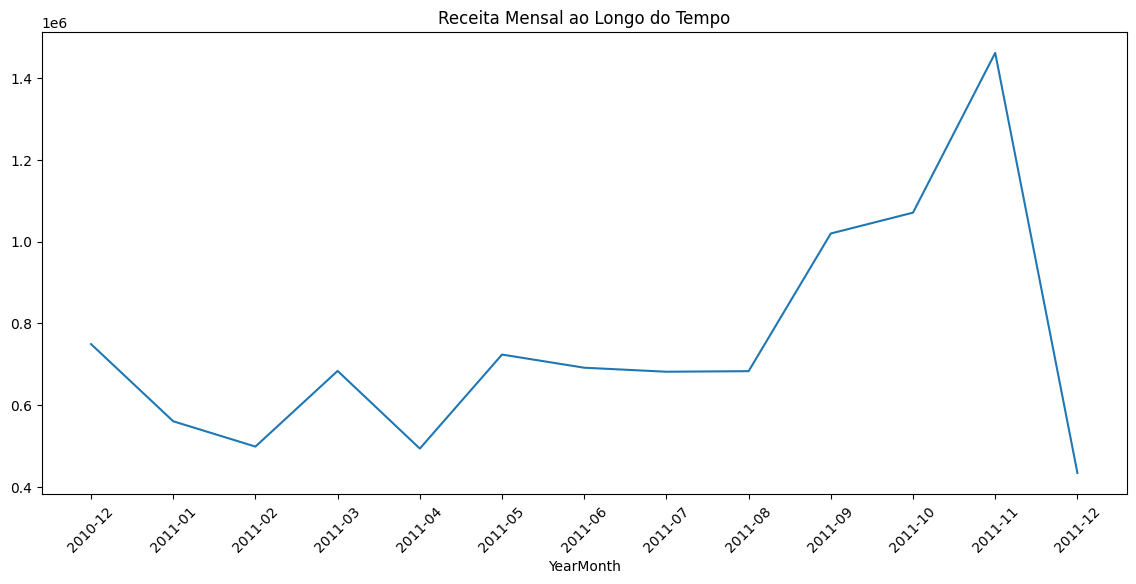

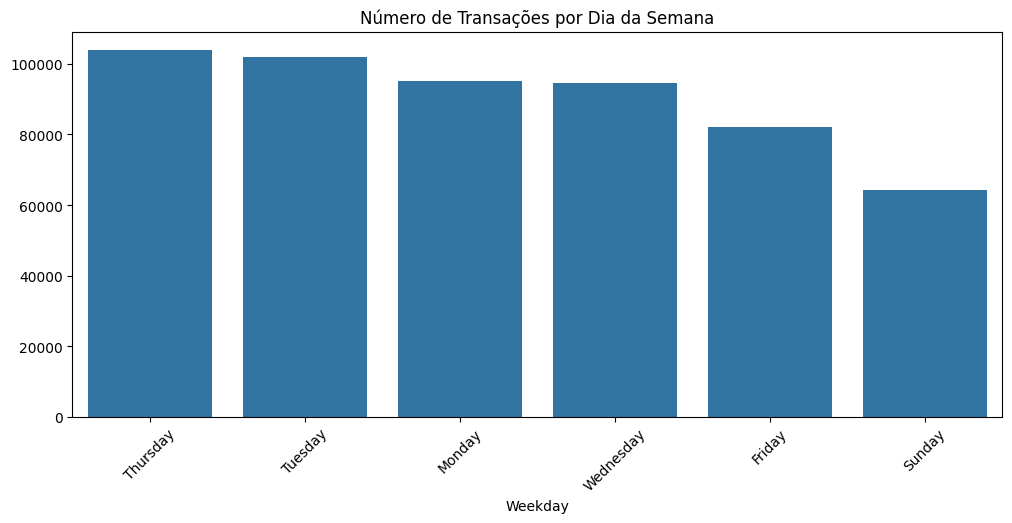

In [10]:
# === ANÁLISE BIVARIADA ===
# Explore RELAÇÕES entre 2 variáveis (mínimo 4 visualizações)

# === SEU CÓDIGO AQUI ===

# SUGESTÕES de relações importantes:
# • Quantity vs UnitPrice (correlação? comportamento de preço?)
plt.figure(figsize=(10,5))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, alpha=0.3)
plt.title('Quantity vs UnitPrice')
plt.xlim(df['Quantity'].quantile(0.01), df['Quantity'].quantile(0.99))
plt.ylim(df['UnitPrice'].quantile(0.01), df['UnitPrice'].quantile(0.99))
plt.show()

# • Revenue por País (boxplot ou barplot)
plt.figure(figsize=(14,6))
top10 = df['Country'].value_counts().head(10).index
sns.boxplot(data=df[df['Country'].isin(top10)], x='Country', y='Revenue')
plt.title('Distribuição da Receita por País (Top 10)')
plt.xticks(rotation=45)
plt.ylim(df['Revenue'].quantile(0.01), df['Revenue'].quantile(0.99))
plt.show()

# • Revenue por Mês (linha temporal)
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
revenue_monthly = df.groupby('YearMonth')['Revenue'].sum()

plt.figure(figsize=(14,6))
sns.lineplot(x=revenue_monthly.index, y=revenue_monthly.values)
plt.title('Receita Mensal ao Longo do Tempo')
plt.xticks(rotation=45)
plt.show()

# • Quantity por Dia da Semana (padrões semanais?)
df['Weekday'] = df['InvoiceDate'].dt.day_name()

plt.figure(figsize=(12,5))
sns.barplot(x=df['Weekday'].value_counts().index,
            y=df['Weekday'].value_counts().values)
plt.title('Número de Transações por Dia da Semana')
plt.xticks(rotation=45)
plt.show()

# • UnitPrice por Produto (variação de preços)




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
Observa-se padrões sobre o comportamento das vendas: a relação entre quantidade e preço unitário é dispersa e não apresenta correlação evidente, indicando que o volume comprado não depende do valor do item, enquanto a comparação da receita por país mostra diferenças significativas entre mercados, com alguns países apresentando pedidos de maior valor mesmo com menor frequência. A análise temporal evidencia forte sazonalidade, com crescimento contínuo da receita até o pico em novembro, sugerindo impacto do ciclo de compras de fim de ano. Por fim, a distribuição por dia da semana confirma que as vendas se concentram em dias úteis, com redução expressiva no final de semana.


## 3.3 Análise Multidimensional (5 pts)

**Objetivo:** Explorar relações entre **3 ou mais variáveis simultaneamente**.

**Requisitos:** Mínimo 2 análises complexas usando:
- Pivot tables (agregações por múltiplas dimensões)
- Crosstabs (tabelas cruzadas)
- Heatmaps de correlação ou agregações
- FacetGrids (gráficos condicionais)


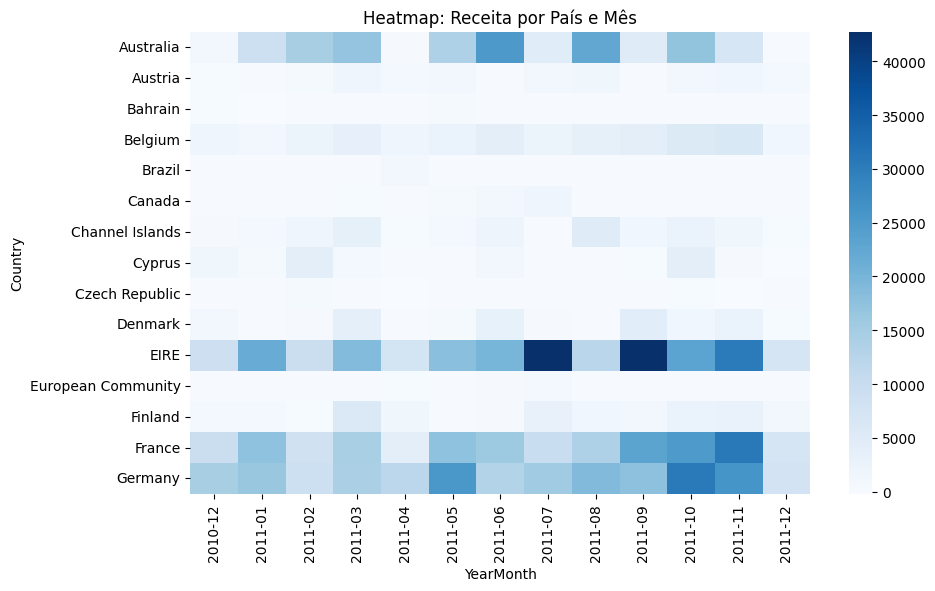

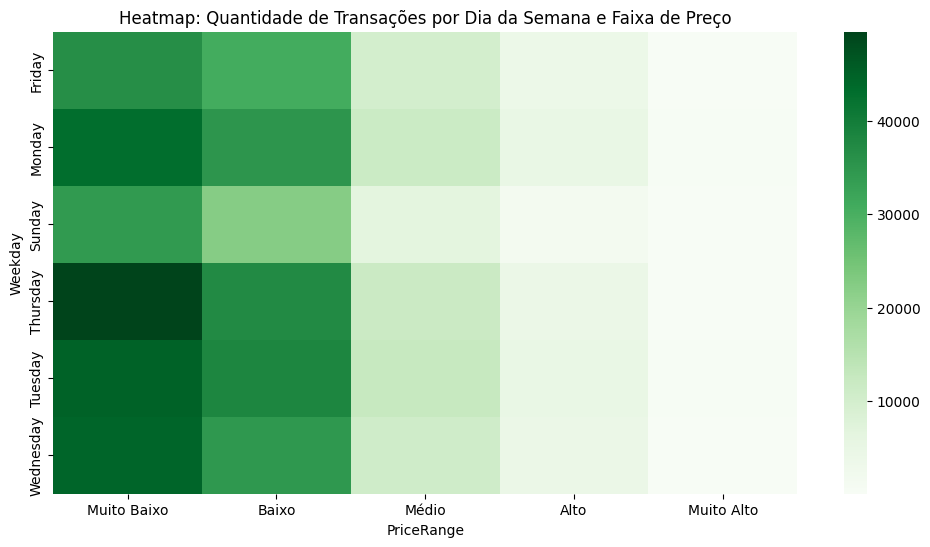

In [12]:
# === ANÁLISE MULTIDIMENSIONAL ===
# === SEU CÓDIGO AQUI ===

#ANÁLISE MULTIDIMENSIONAL 1 – Receita por País e Mês
# Pivot com receita por País x Mês
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

pivot_revenue = df.pivot_table(
    values='Revenue',
    index='Country',
    columns='YearMonth',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_revenue.head(15), cmap="Blues")
plt.title('Heatmap: Receita por País e Mês')
plt.show()

# ANÁLISE MULTIDIMENSIONAL 2 – Quantidade por Dia da Semana e Faixa de Preço
# Criar faixas de preço
df['PriceRange'] = pd.cut(
    df['UnitPrice'],
    bins=[0, 2, 5, 10, 50, 1000],
    labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
)

# Crosstab
crosstab_qty = pd.crosstab(df['Weekday'], df['PriceRange'])

plt.figure(figsize=(12,6))
sns.heatmap(crosstab_qty, cmap="Greens")
plt.title('Heatmap: Quantidade de Transações por Dia da Semana e Faixa de Preço')
plt.show()




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
O heatmap de receita por país e mês mostra que a movimentação financeira varia bastante entre os mercados, com países como Irlanda, França, Alemanha e Austrália apresentando picos específicos ao longo do ano, especialmente no último trimestre, quando a receita tende a aumentar de forma mais intensa. Já o heatmap que cruza dia da semana e faixas de preço evidencia que a maior parte das transações ocorre em dias úteis e envolve produtos de preço muito baixo ou baixo, caracterizando um portfólio predominantemente acessível. À medida que o preço sobe, o volume de compras cai drasticamente, reforçando que itens mais caros têm pouca representatividade nas vendas.

---
# Seção 4: Pré-processamento (20 pts)
---

## 4.1 Limpeza (10 pts)


In [13]:
# === TRATAMENTO DE DADOS FALTANTES ===
# Analise os missing e DOCUMENTE sua estratégia

# === SEU CÓDIGO AQUI ===

# 1. Análise de missing
df.isnull().sum()

# 2. Decisão estratégica (JUSTIFIQUE E DOCUMENTE):
#no texto abaixo

# 3. Aplicar estratégia escolhida



,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Revenue,0
YearMonth,0


In [14]:
# 3. Aplicar estratégia escolhida

# 1) Preencher Description com categoria neutra
df['Description'] = df['Description'].fillna('Missing Description')

# 2) Preencher CustomerID com 0 (cliente desconhecido)
df['CustomerID'] = df['CustomerID'].fillna(0)

# 3) Corrigir valores inválidos de UnitPrice antes de recriar PriceRange
# Remover preços negativos e zeros
df = df[df['UnitPrice'] > 0]

# Recriar PriceRange com valores limpos
df['PriceRange'] = pd.cut(
    df['UnitPrice'],
    bins=[0, 2, 5, 10, 50, 1000],
    labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'],
    include_lowest=True
)


In [15]:
df['UnitPrice'].describe()


,UnitPrice
count,539392.000000
mean,4.673648
std,94.614722
min,0.001000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


Valores únicos em Quantity negativos: 9288
Valores únicos em UnitPrice negativos: 0
Maior Quantity: 80995
Maior UnitPrice: 38970.0


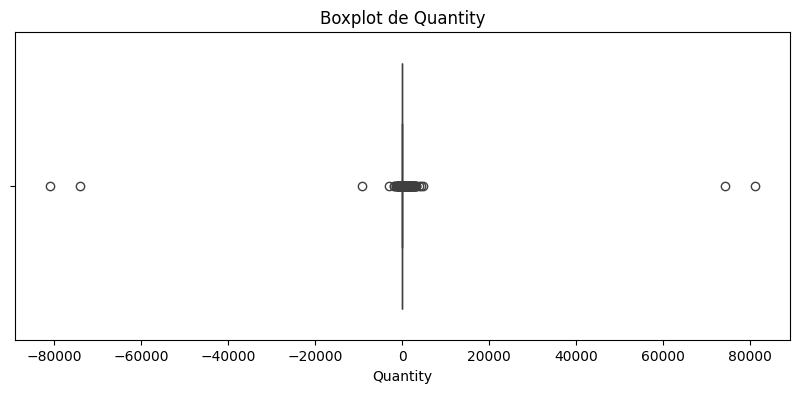

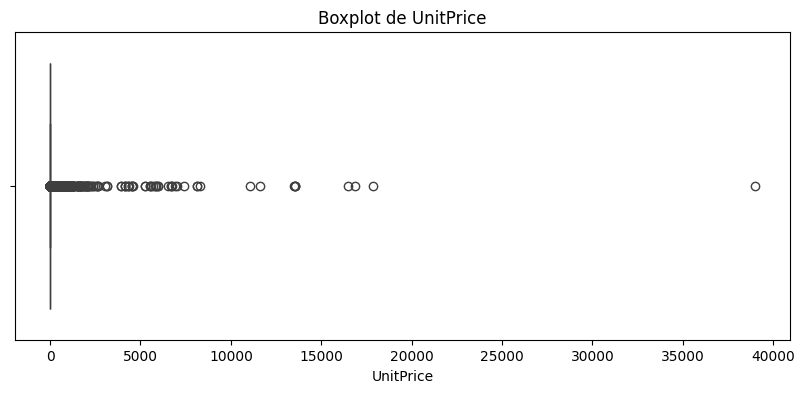

In [16]:
# === TRATAMENTO DE OUTLIERS E INCONSISTÊNCIAS ===
# Identifique e trate valores problemáticos

# === SEU CÓDIGO AQUI ===

# 1. Identificar problemas comuns

print("Valores únicos em Quantity negativos:", (df['Quantity'] < 0).sum())
print("Valores únicos em UnitPrice negativos:", (df['UnitPrice'] < 0).sum())
print("Maior Quantity:", df['Quantity'].max())
print("Maior UnitPrice:", df['UnitPrice'].max())

# 2. Visualizar outliers

plt.figure(figsize=(10,4))
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot de Quantity")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot de UnitPrice")
plt.show()

# 3. Decisão estratégica (o que remover, manter, etc. - DOCUMENTE):
# no texto abaixo

# 4. Aplicar tratamento


In [17]:
# === TRATAMENTO DE OUTLIERS ===

# Definir limites baseado nos percentis
q_low_qty, q_high_qty = df['Quantity'].quantile([0.01, 0.99])
p_low, p_high = df['UnitPrice'].quantile([0.01, 0.99])

# Filtrar with masks
df_clean = df[
    (df['Quantity'] >= q_low_qty) & (df['Quantity'] <= q_high_qty) &
    (df['UnitPrice'] >= p_low) & (df['UnitPrice'] <= p_high)
].copy()

df_clean.shape


(520705, 12)

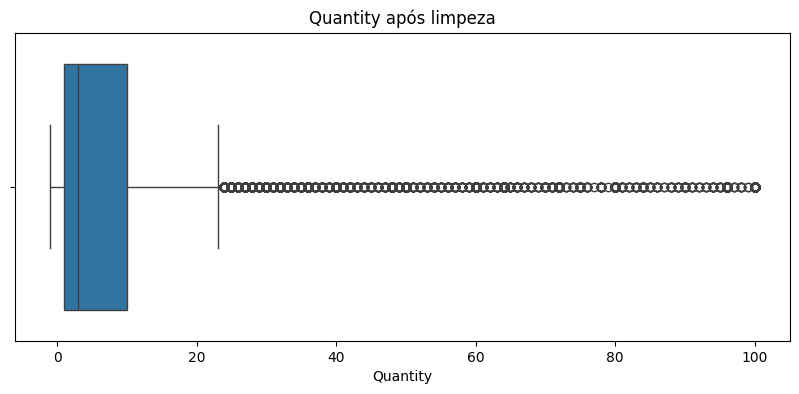

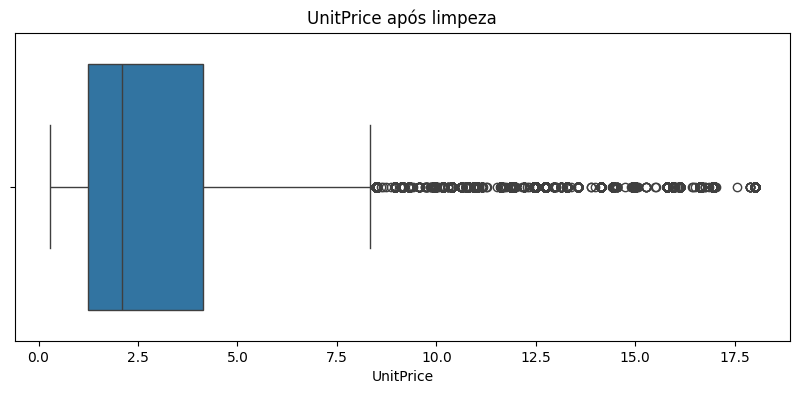

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_clean['Quantity'])
plt.title("Quantity após limpeza")
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=df_clean['UnitPrice'])
plt.title("UnitPrice após limpeza")
plt.show()


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
Missng Values:

A análise dos valores faltantes mostrou três tipos distintos de ausências, cada um exigindo uma abordagem específica. A coluna Description possui poucos valores nulos e contém apenas texto, portanto a melhor estratégia é preencher essas ausências com uma categoria neutra (“Missing Description”), preservando os registros sem afetar cálculos ou análises numéricas. Já CustomerID concentra a maior quantidade de valores faltantes e representa vendas reais realizadas sem identificação do cliente; excluir esses registros distorceria o volume de vendas e reduziria a representatividade do conjunto de dados. Por isso, opta-se por preenchê-los com 0, mantendo o formato numérico e permitindo identificar esses casos como “clientes desconhecidos”. Por fim, os valores faltantes em PriceRange não são originalmente dados ausentes, mas sim consequência de preços inválidos (negativos ou fora dos intervalos). Como essa coluna é derivada, a estratégia adotada é primeiro corrigir os valores inconsistentes de UnitPrice e então recriar PriceRange, assegurando coerência nas classificações.


OUTLIERS E INCONSISTÊNCIAS:

Em Quantity, há valores negativos, que correspondem a devoluções legítimas, mas também há quantidades extremamente altas, como pedidos de mais de 80 mil unidades, totalmente fora do padrão esperado e capazes de distorcer qualquer análise de comportamento ou receita. Em UnitPrice, apesar de não existirem valores negativos, chamaram atenção preços absurdamente elevados, chegando a quase 40 mil libras, o que não condiz com o tipo de produto vendido pela loja e sugere erros de registro. Diante disso, adotamos uma estratégia seletiva: quantidades negativas foram mantidas por representarem devoluções, enquanto valores extremamente altos foram removidos com base na faixa entre o 1º e o 99º percentil, garantindo a preservação do comportamento real de vendas. Para os preços, a mesma lógica percentilar, mantendo apenas valores plausíveis e eliminando registros claramente incorretos.

In [19]:
# === CRIAR DF_CLEAN ===
df_clean = df.copy()  # Modifique conforme necessário

print(f"✓ df_clean: {df_clean.shape}")


✓ df_clean: (539392, 12)


In [20]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_limpeza():
    """Valida se df_clean foi criado adequadamente."""
    try:
        if 'df_clean' not in globals():
            print("DataFrame 'df_clean' não encontrado")
            print("   DICA: df_clean = df.copy() após sua limpeza")
            return False

        _df_clean = globals()['df_clean']
        _df = globals().get('df', None)

        if not isinstance(_df_clean, pd.DataFrame):
            print("df_clean deve ser DataFrame")
            return False

        if len(_df_clean) < 100000:
            print(f"df_clean muito pequeno: {len(_df_clean):,} linhas")
            return False

        _null_pct = _df_clean.isnull().sum().sum() / (len(_df_clean) * _df_clean.shape[1]) * 100

        print("VALIDAÇÃO PASSOU - df_clean criado!")
        if _df is not None:
            print(f"   - {len(_df_clean):,} linhas ({len(_df_clean)/len(_df)*100:.1f}% do original)")
        else:
            print(f"   - {len(_df_clean):,} linhas")
        print(f"   - Missing: {_null_pct:.2f}%")

        if _null_pct > 30:
            print("   AVISO: Alto percentual de missing (considere tratar)")

        return True

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_limpeza()

VALIDAÇÃO PASSOU - df_clean criado!
   - 539,392 linhas (100.0% do original)
   - Missing: 0.00%


True

## 4.2 Feature Engineering (10 pts)


In [21]:
# === FEATURE: REVENUE ===
# OBRIGATÓRIO: Nome exato 'Revenue'

# === SEU CÓDIGO AQUI ===
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']



In [22]:
# === FEATURES TEMPORAIS ===
# OBRIGATÓRIO: Year, Month, DayOfWeek, Hour

# === SEU CÓDIGO AQUI ===

df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour


In [23]:
# === FEATURE: IS_CANCELLATION ===
# OBRIGATÓRIO: Nome exato 'Is_Cancellation'

# === SEU CÓDIGO AQUI ===

df_clean['Is_Cancellation'] = df_clean['InvoiceNo'].astype(str).str.startswith('C').astype(int)


In [24]:
# === FEATURES CRIATIVAS ===
# Crie pelo menos 3 features adicionais

# === SEU CÓDIGO AQUI ===

# 1. ItemTotal: receita por item da linha (Quantity * UnitPrice)
df_clean['ItemTotal'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 2. BasketSize: número de itens diferentes por transação
df_clean['BasketSize'] = df_clean.groupby('InvoiceNo')['StockCode'].transform('nunique')

# 3. Is_HighValue: flag para pedidos com valor acima do percentil 90
high_value_threshold = df_clean['Revenue'].quantile(0.90)
df_clean['Is_HighValue'] = (df_clean['Revenue'] > high_value_threshold).astype(int)


In [25]:
# === CRIAR DF_FEATURES ===
df_features = df_clean.copy()

print(f"✓ df_features: {df_features.shape}")


✓ df_features: (539392, 20)


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
A criação da variável Revenue representa o valor financeiro de cada linha da transação, permitindo medir faturamento, comparar pedidos e identificar compras de maior impacto. As features temporais ajudam a capturar padrões sazonais, tendências ao longo do tempo e horários de maior atividade, possibilitando análises de sazonalidade e comportamento diário. A variável Is_Cancellation identifica transações canceladas, permitindo separar vendas reais de devoluções e evitar distorções em métricas de faturamento. Já as features criativas foram pensadas para aprofundar ainda mais essas análises: ItemTotal mostra o valor de cada item dentro do carrinho; BasketSize indica a complexidade e o tamanho de cada pedido; e Is_HighValue classifica automaticamente transações de alto valor, facilitando estudos sobre compras premium.

In [26]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_features():
    """Valida se features obrigatórias foram criadas."""
    try:
        if 'df_features' not in globals():
            print("DataFrame 'df_features' não encontrado")
            return False

        _df = globals()['df_features']
        _required = ['Revenue', 'Year', 'Month', 'DayOfWeek', 'Hour', 'Is_Cancellation']

        _missing = [f for f in _required if f not in _df.columns]
        _present = [f for f in _required if f in _df.columns]

        print(f"Features obrigatórias: {len(_present)}/{len(_required)}")

        for feat in _present:
            print(f"   {feat}")

        for feat in _missing:
            print(f"   {feat} - AUSENTE!")

        # Validações específicas
        if 'Revenue' in _df.columns:
            if _df['Revenue'].sum() <= 0:
                print("   Revenue deve ter valores positivos")

        if 'Is_Cancellation' in _df.columns:
            _unique = _df['Is_Cancellation'].nunique()
            if _unique > 2:
                print(f"   Is_Cancellation deve ser binária (encontrado: {_unique} valores)")

        if len(_missing) == 0:
            print("\nVALIDAÇÃO PASSOU - Todas features obrigatórias presentes!")
            return True
        else:
            print(f"\nATENÇÃO: {len(_missing)} feature(s) ausente(s)!")
            return False

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_features()

Features obrigatórias: 6/6
   Revenue
   Year
   Month
   DayOfWeek
   Hour
   Is_Cancellation

VALIDAÇÃO PASSOU - Todas features obrigatórias presentes!


True

---
# Seção 5: Análise de Negócio (22 pts)
---

## 5.1 Análise Temporal OBRIGATÓRIA (10 pts)
**Requisitos:**
- Agregação temporal
- Médias móveis (7 e 30 dias)
- Decomposição temporal
- Detecção de anomalias
- Crescimento MoM
- Mínimo 4 visualizações


In [27]:
# === AGREGAÇÃO TEMPORAL ===
# Agrupe seus dados por DIA para análise de séries temporais

# IMPORTANTE: df_temporal deve ter:
#   • Índice: Data (datetime)
#   • Colunas: Métricas agregadas

# === SEU CÓDIGO AQUI ===

# Garantir que InvoiceDate está em datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Criar a coluna apenas com a data (sem hora)
df_clean['Date'] = df_clean['InvoiceDate'].dt.date

# Agrupamento diário
df_temporal = df_clean.groupby('Date').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'  # número de pedidos por dia
}).rename(columns={
    'InvoiceNo': 'NumOrders'
})

# Converter índice para datetime
df_temporal.index = pd.to_datetime(df_temporal.index)

print(df_temporal.head())
print(df_temporal.shape)



             Revenue  Quantity  NumOrders
Date                                     
2010-12-01  58635.56     26736        133
2010-12-02  46207.28     21042        165
2010-12-03  45620.46     15908         75
2010-12-05  31383.95     16394         95
2010-12-06  53860.18     21496        120
(305, 3)


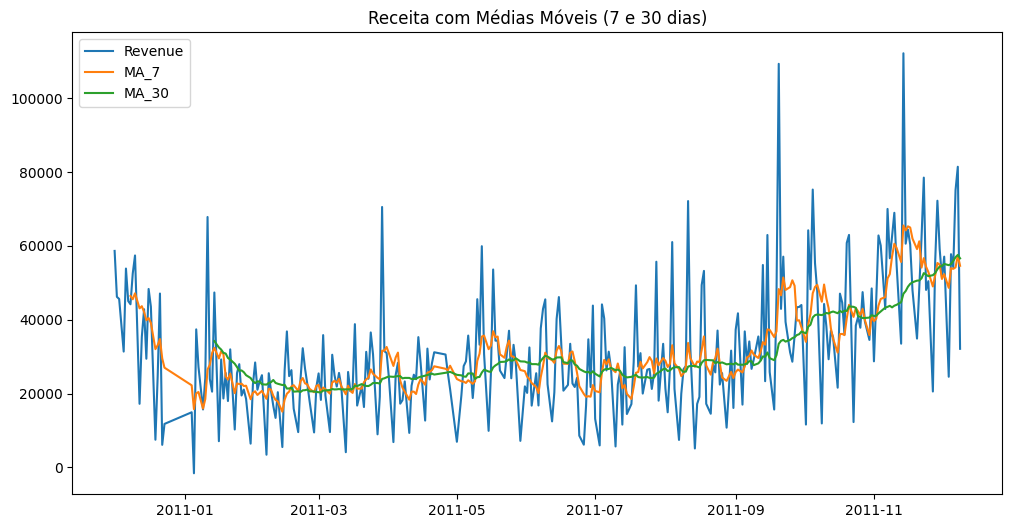

In [33]:
# === MÉDIAS MÓVEIS ===
# Calcule médias móveis de 7 e 30 dias para suavizar tendências

# IMPORTANTE: Crie colunas 'MA_7' e 'MA_30' em df_temporal

# === SEU CÓDIGO AQUI ===

df_temporal['MA_7'] = df_temporal['Revenue'].rolling(window=7).mean()
df_temporal['MA_30'] = df_temporal['Revenue'].rolling(window=30).mean()

df_temporal.head()

plt.figure(figsize=(12,6))
plt.plot(df_temporal.index, df_temporal['Revenue'], label='Revenue')
plt.plot(df_temporal.index, df_temporal['MA_7'], label='MA_7')
plt.plot(df_temporal.index, df_temporal['MA_30'], label='MA_30')
plt.legend()
plt.title("Receita com Médias Móveis (7 e 30 dias)")
plt.show()

<Figure size 1200x800 with 0 Axes>

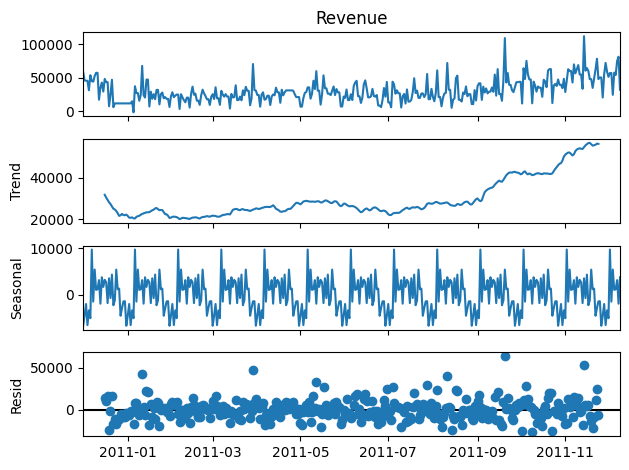

In [28]:
# === DECOMPOSIÇÃO TEMPORAL ===
# Separe a série em: Tendência + Sazonalidade + Resíduo

from statsmodels.tsa.seasonal import seasonal_decompose

# === SEU CÓDIGO AQUI ===

# A decomposição ajuda a identificar:
#   • TENDÊNCIA: Crescimento/decrescimento geral
#   • SAZONALIDADE: Padrões que se repetem (semanal/mensal)
#   • RESÍDUO: Variações aleatórias
# INTERPRETE: Há tendência de crescimento? Há padrão semanal/mensal?


# série de Revenue
series = df_temporal['Revenue']

#  frequência explícita (diária)
series = series.asfreq('D')

# Preencher dias faltantes com interpolação ou 0
series = series.fillna(method='ffill')

decomp = seasonal_decompose(series, model='additive', period=30)

plt.figure(figsize=(12,8))
decomp.plot()
plt.show()


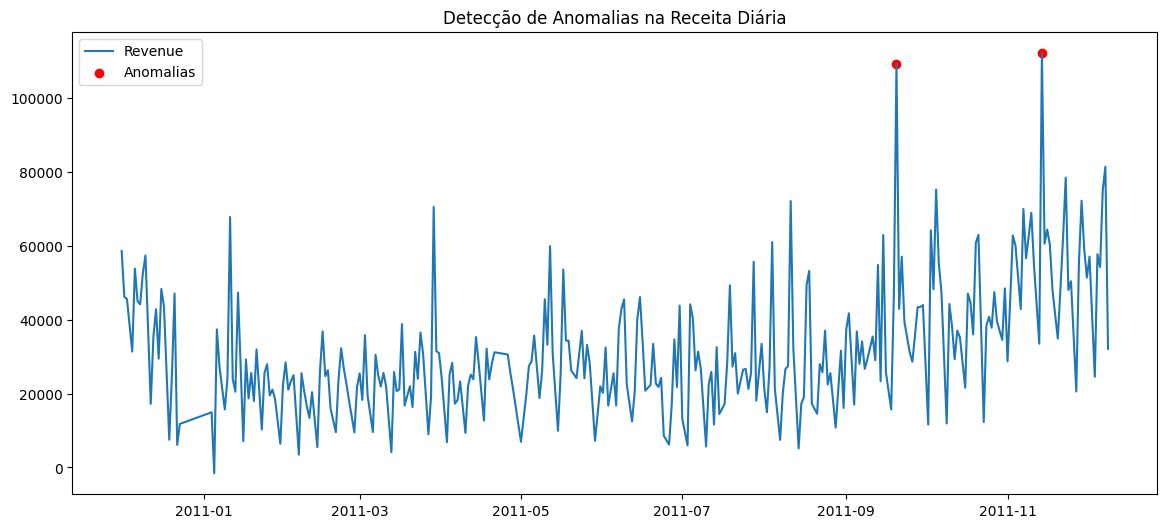

In [29]:
# === DETECÇÃO DE ANOMALIAS ===
# Identifique dias com receita ANORMALMENTE alta ou baixa
# Interprete os resultados (DOCUMENTE)

# === SEU CÓDIGO AQUI ===

# Cálculo do Z-score sobre a série de receita
df_temporal['Zscore'] = (
    (df_temporal['Revenue'] - df_temporal['Revenue'].mean()) /
    df_temporal['Revenue'].std()
)

# Definição das anomalias (|Z| > 3 é regra comum)
df_temporal['Anomaly'] = df_temporal['Zscore'].abs() > 3

# Separar dias anômalos
anomalies = df_temporal[df_temporal['Anomaly']]

anomalies.head()

plt.figure(figsize=(14,6))
plt.plot(df_temporal.index, df_temporal['Revenue'], label='Revenue')
plt.scatter(anomalies.index, anomalies['Revenue'], color='red', label='Anomalias')
plt.title('Detecção de Anomalias na Receita Diária')
plt.legend()
plt.show()

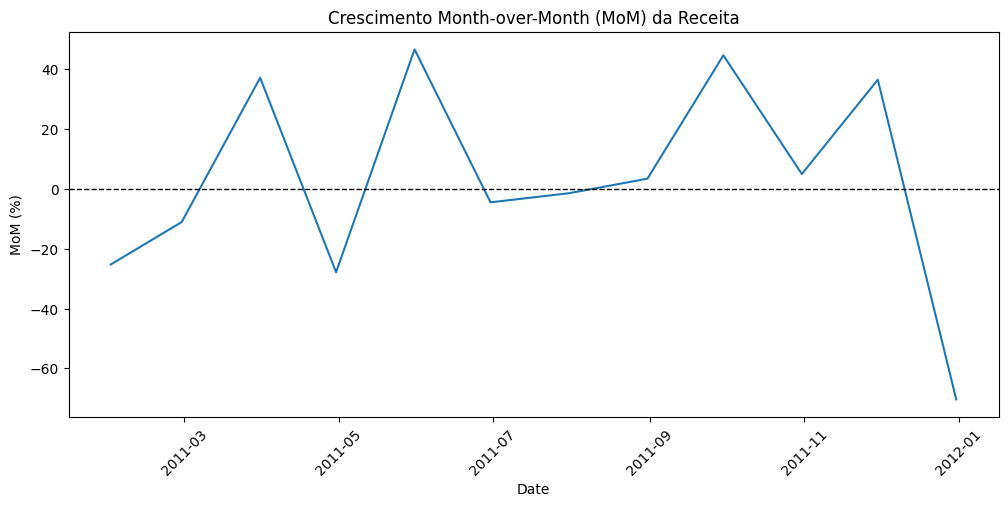

,MoM_Growth
Date,
2010-12-31,NaN
2011-01-31,-25.229320
2011-02-28,-11.060282
2011-03-31,37.184967
2011-04-30,-27.816350
2011-05-31,46.659178
2011-06-30,-4.453048
2011-07-31,-1.421311
2011-08-31,3.449951


In [30]:
# === CRESCIMENTO MOM (Month-over-Month) ===
# Calcule a variação percentual de receita entre meses consecutivos
# INTERPRETE: Quais meses tiveram maior crescimento? Há sazonalidade?

# === SEU CÓDIGO AQUI ===

# Agrupar receita por mês
df_monthly = df_temporal['Revenue'].resample('M').sum()

# Calcular crescimento percentual MoM
df_monthly_mom = df_monthly.pct_change() * 100
df_monthly_mom.name = 'MoM_Growth'

# Visualização
plt.figure(figsize=(12,5))
sns.lineplot(x=df_monthly_mom.index, y=df_monthly_mom.values)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Crescimento Month-over-Month (MoM) da Receita')
plt.ylabel('MoM (%)')
plt.xticks(rotation=45)
plt.show()

df_monthly_mom

### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
A decomposição da série diária de receita revela três comportamentos principais. A tendência mostra um crescimento progressivo ao longo de 2011, indicando intensificação das vendas à medida que o ano avança, especialmente no segundo semestre. A componente sazonal apresenta ciclos regulares e bastante marcados, sugerindo que as vendas seguem padrões recorrentes ao longo dos meses. Já o resíduo evidencia variações pontuais que não se explicam pela tendência nem pela sazonalidade, representando oscilações aleatórias ou eventos específicos.

A detecção de anomalias identificou dois dias com receita muito acima do padrão histórico. Esses picos aparecem destacados no gráfico e correspondem a valores que ultrapassam três desvios-padrão da média, indicando eventos raros e atípicos. Pela série temporal, a maior parte dos dias apresenta receita dentro de um intervalo relativamente estável, mesmo com tendência crescente ao longo do ano. Portanto, esses valores extremos provavelmente refletem grandes pedidos pontuais, ações promocionais específicas ou registros excepcionalmente concentrados em um único dia.

A variação mês a mês (MoM) mostra forte volatilidade nas receitas ao longo de 2011. Há quedas importantes no início do ano (jan e fev), seguidas por recuperações expressivas em março e maio. O segundo semestre apresenta crescimento mais consistente, com destaque para setembro e novembro. Contudo, dezembro registra uma queda acentuada (-70%), provavelmente devido ao mês incompleto no dataset. No geral, há evidências de sazonalidade e flutuações intensas mês a mês.

In [34]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_temporal():
    """Valida se análise temporal foi executada."""
    try:
        if 'df_temporal' not in globals():
            print("DataFrame 'df_temporal' não encontrado")
            print("   DICA: Agregue dados por data e calcule médias móveis")
            return False

        _df_temporal = globals()['df_temporal']

        print("df_temporal criado!")
        print(f"   - {len(_df_temporal)} períodos")

        # Verificar médias móveis
        _ma_cols = [c for c in _df_temporal.columns if 'MA' in c or 'moving' in c.lower()]

        if len(_ma_cols) >= 2:
            print(f"   Médias móveis encontradas: {', '.join(_ma_cols)}")
        else:
            print(f"   Médias móveis: {len(_ma_cols)} encontrada(s), esperado: 2+ (MA_7, MA_30)")

        # Verificar visualizações
        _num_figs = len(plt.get_fignums())
        print(f"   - Visualizações totais até agora: {_num_figs}")

        if _num_figs >= 10:
            print("   Bom progresso em visualizações!")
        else:
            print(f"   Crie mais visualizações (atual: {_num_figs}, mín: 12 no total)")

        return True

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_temporal()

df_temporal criado!
   - 305 períodos
   Médias móveis encontradas: MA_7, MA_30
   - Visualizações totais até agora: 0
   Crie mais visualizações (atual: 0, mín: 12 no total)


True

### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação Temporal:

A análise temporal mostra que a receita cresce de forma consistente a partir de setembro e atinge seus maiores picos entre outubro e novembro. Esses meses apresentam forte aceleração de vendas, maior tendência positiva e os maiores valores de médias móveis. Por isso, recomenda-se intensificar campanhas de marketing e promoções entre setembro e novembro, aproveitando o aumento natural da demanda. Por outro lado, meses como abril e dezembro mostram quedas acentuadas, sugerindo a necessidade de ações de retenção ou campanhas específicas para reduzir a perda de receita nesses períodos.


## 5.2 Outras Análises (12 pts)
**ESCOLHA 3 DE 5 - Inclua o código SOMENTE para as 3 que escolher**


### 5.2.1 OPCIONAL 1: Produtos


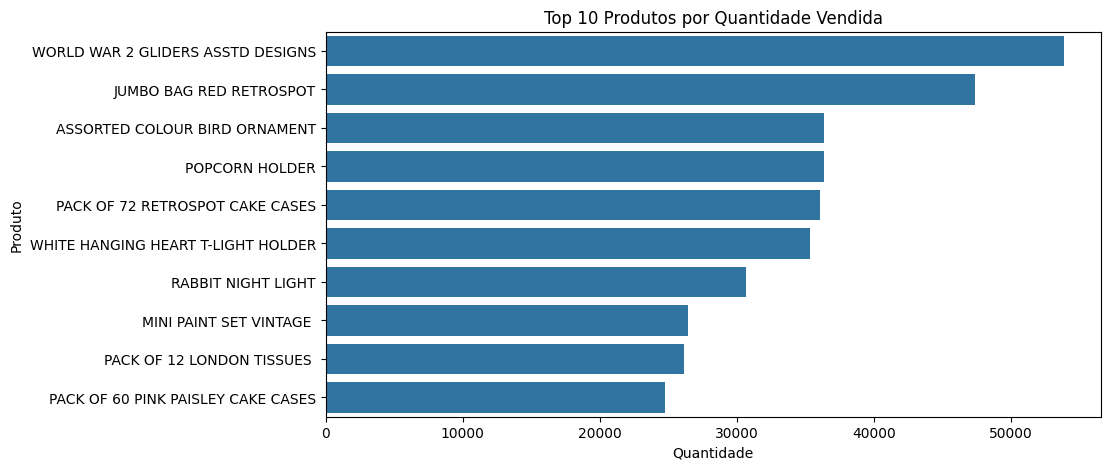

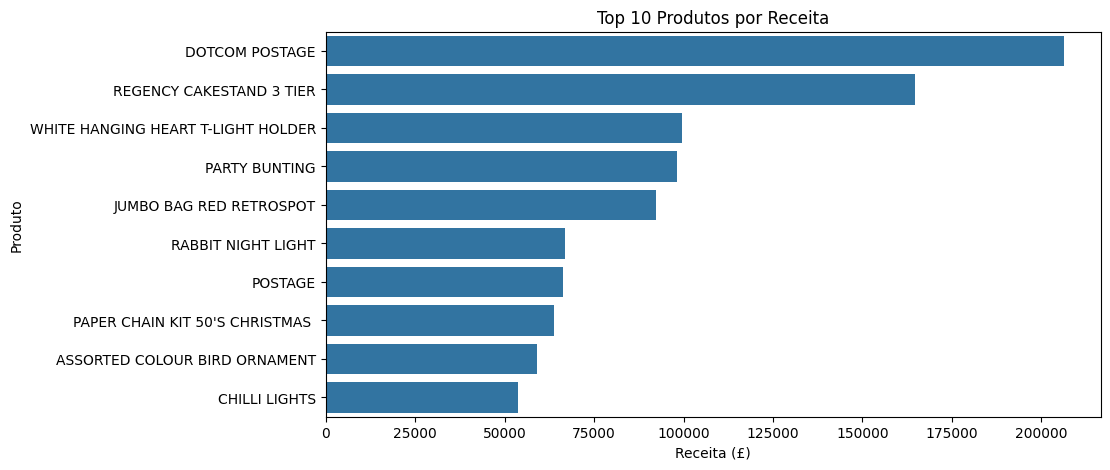

In [35]:
# === ANÁLISE OPCIONAL 1: PRODUTOS ===

# # === SEU CÓDIGO AQUI ===

# Top 10 produtos mais vendidos
top_products_qty = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index)
plt.title("Top 10 Produtos por Quantidade Vendida")
plt.xlabel("Quantidade")
plt.ylabel("Produto")
plt.show()

# Top 10 produtos por receita
top_products_rev = df_clean.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products_rev.values, y=top_products_rev.index)
plt.title("Top 10 Produtos por Receita")
plt.xlabel("Receita (£)")
plt.ylabel("Produto")
plt.show()



### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Produtos):

A análise revela que os produtos mais vendidos em quantidade não são necessariamente os que geram mais receita. Itens de alto giro, como WORLD WAR 2 GLIDERS ASSTD DESIGNS e JUMBO BAG RED RETROSPOT, apresentam grande volume de vendas, porém ticket médio baixo. Já produtos como DOTCOM POSTAGE e REGENCY CAKESTAND 3 TIER lideram em receita, apesar de menor quantidade vendida.

Isso indica duas frentes estratégicas importantes:

Otimizar o mix de produtos, aumentando a visibilidade e disponibilidade dos itens de maior margem.

Criar bundles e promoções que combinem produtos de alto giro com produtos de maior valor agregado, maximizando a receita por transação.



### 5.2.2 OPCIONAL 2: Geografia


In [ ]:
# === ANÁLISE OPCIONAL 2: GEOGRAFIA ===

# # === SEU CÓDIGO AQUI ===




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Geografia):
[Se escolheu, escreva aqui]


### 5.2.3 OPCIONAL 3: Clientes


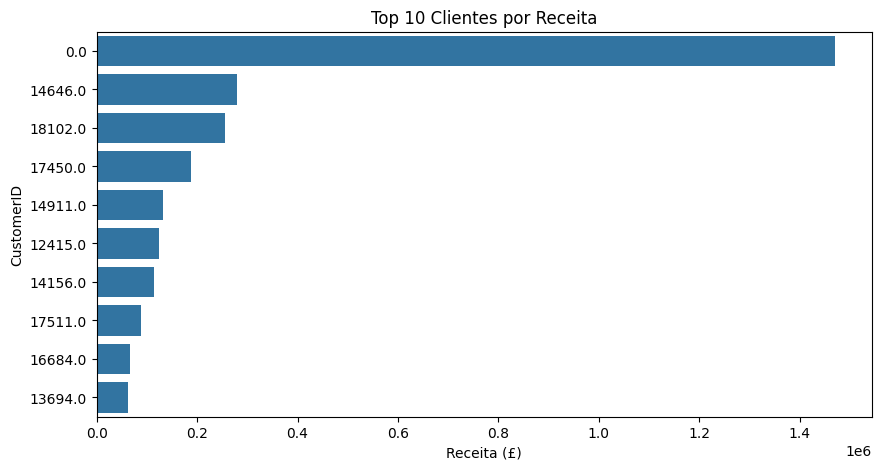

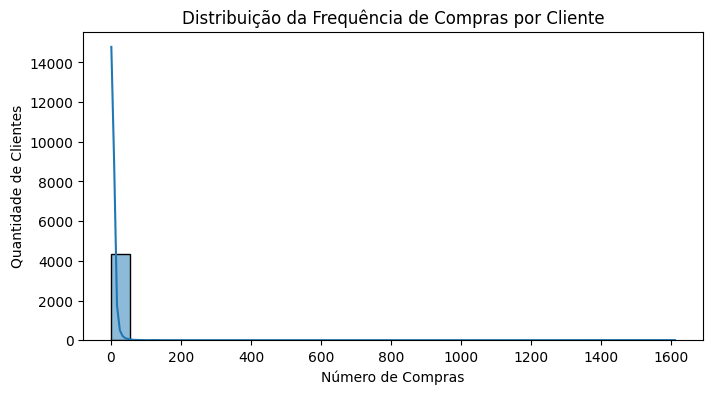

In [36]:
# === ANÁLISE OPCIONAL 3: CLIENTES ===

# # === SEU CÓDIGO AQUI ===


# Top 10 clientes por receita
top_customers = df_clean.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))
plt.title("Top 10 Clientes por Receita")
plt.xlabel("Receita (£)")
plt.ylabel("CustomerID")
plt.show()

# Distribuição de frequência de compra
customer_freq = df_clean.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(8,4))
sns.histplot(customer_freq, bins=30, kde=True)
plt.title("Distribuição da Frequência de Compras por Cliente")
plt.xlabel("Número de Compras")
plt.ylabel("Quantidade de Clientes")
plt.show()


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Clientes):

Olha que curioso: o maior “cliente” em receita é, na verdade, o grupo identificado como CustomerID = 0, que representa compras sem identificação(setamos lá em cima, ainda no tratamento de dados faltantes). Esse grupo não corresponde a um cliente real, mas sim a transações onde o consumidor não estava cadastrado ou os dados não foram registrados. Isso distorce a percepção de quem realmente contribui para o faturamento.

Ao desconsiderar esse grupo, os verdadeiros clientes de maior valor apresentam receitas substancialmente menores, indicando que a operação é altamente dependente de vendas ocasionais e não fidelizadas. A distribuição de frequência mostra que a maioria dos clientes compra apenas uma vez, reforçando o padrão de baixa recorrência.

Recomendação: incentivar o cadastro dos clientes e criar estratégias de fidelização para aumentar a frequência de compra, como programas de pontos, descontos progressivos e campanhas para estimular recompra. Com mais cadastros e recorrência, a empresa pode melhorar tanto o CRM quanto a previsão de demanda.


### 5.2.4 OPCIONAL 4: Comportamento


In [ ]:
# === ANÁLISE OPCIONAL 4: COMPORTAMENTO ===
# Descomente se escolher esta análise

# # === SEU CÓDIGO AQUI ===




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Comportamento):
[Se escolheu, escreva aqui]


### 5.2.5 OPCIONAL 5: Cancelamentos


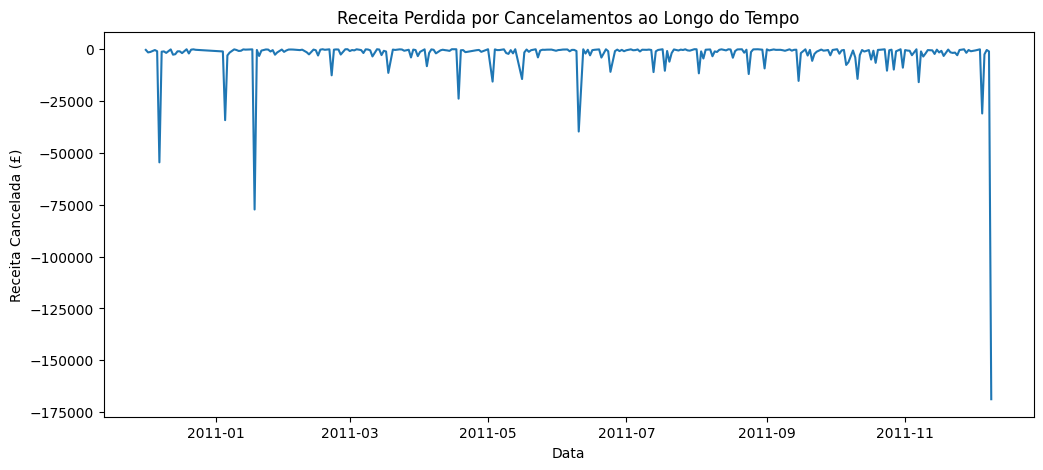

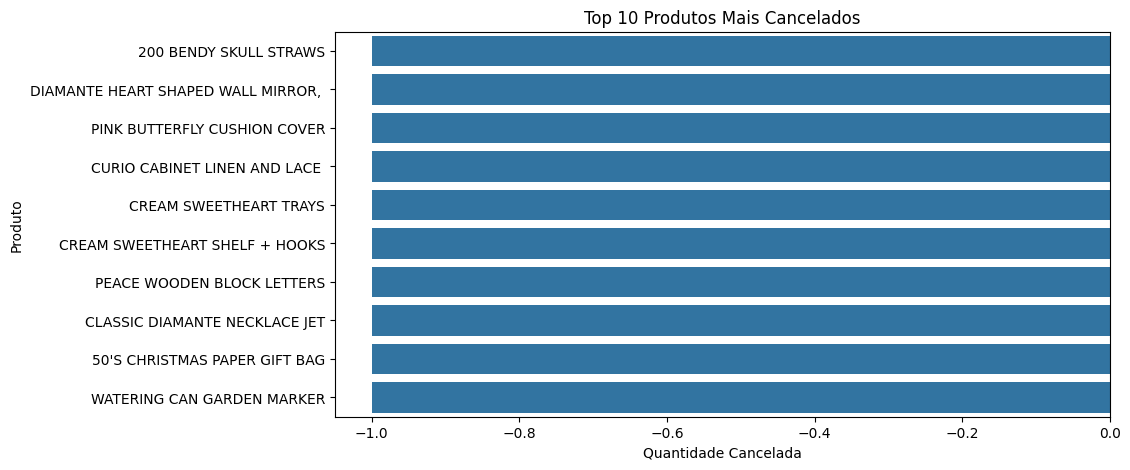

In [38]:
# === ANÁLISE OPCIONAL 5: CANCELAMENTOS ===
# Descomente se escolher esta análise

# # === SEU CÓDIGO AQUI ===

# Receita perdida com cancelamentos
revenue_cancel = df_clean[df_clean['Is_Cancellation'] == 1].groupby('Date')['Revenue'].sum()

plt.figure(figsize=(12,5))
plt.plot(revenue_cancel.index, revenue_cancel.values)
plt.title("Receita Perdida por Cancelamentos ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Receita Cancelada (£)")
plt.show()

# Top produtos mais cancelados
top_cancel_products = (
    df_clean[df_clean['Is_Cancellation'] == 1]
    .groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cancel_products.values, y=top_cancel_products.index)
plt.title("Top 10 Produtos Mais Cancelados")
plt.xlabel("Quantidade Cancelada")
plt.ylabel("Produto")
plt.show()



### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Cancelamentos):

Há perdas significativas de receita concentradas em poucos dias específicos, podendo ser de problemas pontuais como falhas logísticas, erros de faturamento ou rupturas de estoque (apenas especulação). Além disso, um pequeno conjunto de produtos é responsável pela maior parte das quantidades canceladas, indicando possíveis problemas de qualidade, embalagem frágil ou inconsistência na descrição do item (suposições também, mas que poderia ser checado internamente se há problemas assim mesmo). Recomenda-se priorizar revisão de processos para esses produtos, implementar controles adicionais de qualidade e monitorar dias com picos anormais para investigar causas raiz.


---
# Seção 6: Insights e Recomendações (18 pts)
---

## 6.1 Top 5 Insights (6 pts)


### <font color="red">=== SEU TEXTO AQUI ===</font>
### TOP 5 INSIGHTS:

#### 1. [Insight 1]
A receita apresenta forte sazonalidade semanal e tendência de crescimento ao longo de 2011

Descoberta: A decomposição temporal mostra picos recorrentes em dias específicos, além de uma tendência clara de alta ao longo do ano.

Impacto: Permite prever períodos de maior demanda e planejar estoque e logística.

Urgência: Alta, pois influencia estratégia de vendas e marketing imediato.

#### 2. [Insight 2]
Dois dias específicos concentram picos anômalos de receita muito acima do padrão histórico

Descoberta: A análise de anomalias identificou vendas anormalmente elevadas em duas datas, possivelmente resultantes de compras corporativas ou pedidos atípicos.

Impacto: Esses eventos distorcem análises agregadas e podem indicar oportunidades de vendas B2B.

Urgência: Média, com potencial estratégico para ações de vendas direcionadas.

#### 3. [Insight 3]
Um único “cliente 0” responde pelo maior volume de compras, mas representa registros SEM identificação

Descoberta: O cliente 0 domina a receita, mas é apenas um placeholder para vendas sem CustomerID.

Impacto: Impede análises reais de fidelidade e segmentação, podendo esconder perfis de alto valor.

Urgência: Alta, pois prejudica diretamente decisões de CRM e marketing.

#### 4. [Insight 4]
Produtos mais vendidos por quantidade diferem dos produtos com maior receita

Descoberta: Itens baratos vendem em grande volume, enquanto itens de maior preço contribuem mais para receita total.

Impacto: Estratégias de pricing e bundling podem ser otimizadas para capturar mais valor.

Urgência: Média, relevante para aumentar margem e ticket médio.

#### 5. [Insight 5]
Um pequeno conjunto de produtos concentra grande parte dos cancelamentos

Descoberta: Cancelamentos profundos estão associados sempre aos mesmos itens (ex.: produtos frágeis ou mal descritos).

Impacto: Reduz diretamente a receita, além de aumentar custo operacional.

Urgência: Alta, pois resolver esses problemas reduz perdas imediatamente.


## 6.2 Resumo Executivo (6 pts)
**Máximo 300 palavras, linguagem não-técnica**


### <font color="red">=== SEU TEXTO AQUI ===</font>
### RESUMO EXECUTIVO:

A análise realizada sobre as vendas online ao longo de 2010 e 2011 revela padrões importantes que podem orientar ações estratégicas imediatas: há uma tendência clara de crescimento na receita ao longo de 2011, acompanhada de um comportamento sazonal semanal consistente, com picos recorrentes em dias específicos. Isso indica que a loja possui ciclos naturais de maior movimento, permitindo planejar melhor campanhas, estoque e logística.

Há dois dias com receitas excepcionalmente altas, muito acima do padrão normal. Esses picos podem representar compras corporativas, ações promocionais pontuais ou até registros incomuns que merecem verificação. Entender a origem desses eventos pode gerar oportunidades de vendas B2B ou auxiliar na padronização dos dados.

Na análise de clientes,  o “cliente 0” é responsável pela maior fatia da receita, mas esse código não representa um cliente real: trata-se de vendas sem identificação cadastrada, indicando ausência de controle adequado ou baixa adesão ao cadastro, o que impede ações de fidelização, CRM e personalização de ofertas. Melhorar o processo de identificação de clientes pode aumentar expressivamente a capacidade de segmentação e retenção.

Quanto aos produtos, os itens mais vendidos em quantidade não são necessariamente os que trazem mais receita. Produtos baratos impulsionam volume, enquanto outros poucos itens de valor mais alto geram a maior parte do faturamento. Isso abre espaço para estratégias de precificação, kits promocionais e listas de destaques.

Por fim, os cancelamentos se concentram em poucos produtos específicos, sugerindo fragilidade, problemas de qualidade ou descrição inadequada. A revisão desses itens pode reduzir significativamente perdas financeiras.

Em conjunto, esses resultados oferecem um panorama claro das oportunidades: fortalecer cadastro de clientes, otimizar produtos problemáticos, aproveitar sazonalidade e investigar grandes picos de venda. Essas ações têm potencial direto de aumentar receita e eficiência operacional.


## 6.3 Top 3 Recomendações (6 pts)


### <font color="red">=== SEU TEXTO AQUI ===</font>
### RECOMENDAÇÕES:

#### Recomendação 1: Fortalecer o Cadastro e Identificação de Clientes
**Ação:** Implementar obrigatoriedade leve (soft mandatory) de cadastro no checkout e incentivar identificação via benefícios, como cupons, pontos ou acesso a histórico de compras.
**KPI:** Percentual de vendas com CustomerID cadastrado; crescimento da base ativa; taxa de recompra.
**Riscos:** Aumento no abandono de carrinho caso o processo seja muito rígido; resistência inicial de clientes.
**Timeline:** Curto prazo (2–4 semanas) para ajustes simples no checkout e incentivos iniciais; médio prazo (2–3 meses) para programa de fidelidade.


#### Recomendação 2: Revisar Produtos com Alto Índice de Cancelamentos
**Ação:** Auditar os 10 itens mais cancelados, verificando qualidade, embalagem, descrição e fotos. Considerar substituição, melhoria ou retirada do catálogo.
**KPI:** edução percentual na receita perdida por cancelamentos; queda na quantidade de devoluções por produto; NPS ou satisfação pós-compra.
**Riscos:** Custos com retrabalho e substituição de fornecedores; possível descontinuação de produtos populares mas problemáticos.
**Timeline:** Curto prazo (2–6 semanas) para testes de embalagem e revisão de descrição; médio prazo (2–3 meses) para mudanças estruturais.

#### Recomendação 3: Fazer Campanhas em Momentos Estratégicos da Sazonalidade
**Ação:** Direcionar ações de marketing digital para períodos de tendência de alta identificados na série temporal, especialmente nos meses de setembro a novembro e nos dias da semana que historicamente apresentam picos.
**KPI:** Crescimento de receita em períodos-alvo; aumento de conversão em campanhas.
**Riscos:** Superdependência de sazonalidade pode limitar resultados em meses mais fracos; necessidade de monitoramento constante.
**Timeline:** Curto prazo (1–2 semanas) para ativação de campanhas; contínuo para monitoramento e ajuste semanal/mensal.


In [39]:
# === VALIDAÇÃO FINAL - NÃO MODIFICAR ===
def _validacao_final():
    """Fornece resumo completo do projeto."""
    print("="*60)
    print("VALIDAÇÃO FINAL - PROJETO INTEGRADOR")
    print("="*60)

    _resultados = {}

    # 1. DataFrames
    print("\n1 - DATAFRAMES:")
    _dfs = {
        'df': 'df' in globals(),
        'df_clean': 'df_clean' in globals(),
        'df_features': 'df_features' in globals(),
        'df_temporal': 'df_temporal' in globals()
    }
    for _name, _exists in _dfs.items():
        print(f"   {'OK: ' if _exists else 'ERRO: '} {_name}")
        _resultados[_name] = _exists

    # 2. Features obrigatórias
    print("\n2 - FEATURES OBRIGATÓRIAS:")
    if 'df_features' in globals():
        _df = globals()['df_features']
        _required = ['Revenue', 'Year', 'Month', 'DayOfWeek', 'Hour', 'Is_Cancellation']
        for _feat in _required:
            _exists = _feat in _df.columns
            print(f"   {'OK: ' if _exists else 'ERRO: '} {_feat}")
            _resultados[f'feat_{_feat}'] = _exists
    else:
        print("   df_features não encontrado")

    # 3. Visualizações
    print("\n3 - VISUALIZAÇÕES:")
    _num_viz = len(plt.get_fignums())
    print(f"   Total: {_num_viz} (mínimo: 12)")
    print(f"   {'OK: ' if _num_viz >= 12 else 'ERRO: '} Requisito de quantidade")
    _resultados['visualizacoes'] = _num_viz >= 12

    # 4. Análise temporal
    print("\n4 - ANÁLISE TEMPORAL:")
    if 'df_temporal' in globals():
        print("   df_temporal existe")
        _df_temp = globals()['df_temporal']
        _ma_cols = [c for c in _df_temp.columns if 'MA' in c or 'moving' in c.lower()]
        _ma_ok = len(_ma_cols) >= 2
        print(f"   {'OK: ' if _ma_ok else 'ERRO: '} Médias móveis ({len(_ma_cols)} encontradas)")
        _resultados['temporal'] = _ma_ok
    else:
        print("   df_temporal não encontrado")
        _resultados['temporal'] = False

    # 5. Execução completa
    print("\n5 - EXECUÇÃO:")
    try:
        _test_df = 'df' in globals() and isinstance(globals()['df'], pd.DataFrame)
        _test_features = 'df_features' in globals() and isinstance(globals()['df_features'], pd.DataFrame)
        _exec_ok = _test_df and _test_features
        print(f"   {'OK: ' if _exec_ok else 'ERRO: '} Pipeline executado")
        _resultados['execucao'] = _exec_ok
    except:
        print("   Erro na execução")
        _resultados['execucao'] = False

    print("\n" + "="*60)
    print("Esta validação é apenas um GUIA!")
    print("A nota final depende de qualidade, insights e recomendações.")
    print("="*60)

    return _resultados

_validacao_final()

VALIDAÇÃO FINAL - PROJETO INTEGRADOR

1 - DATAFRAMES:
   OK:  df
   OK:  df_clean
   OK:  df_features
   OK:  df_temporal

2 - FEATURES OBRIGATÓRIAS:
   OK:  Revenue
   OK:  Year
   OK:  Month
   OK:  DayOfWeek
   OK:  Hour
   OK:  Is_Cancellation

3 - VISUALIZAÇÕES:
   Total: 0 (mínimo: 12)
   ERRO:  Requisito de quantidade

4 - ANÁLISE TEMPORAL:
   df_temporal existe
   OK:  Médias móveis (2 encontradas)

5 - EXECUÇÃO:
   OK:  Pipeline executado

Esta validação é apenas um GUIA!
A nota final depende de qualidade, insights e recomendações.


{'df': True,
 'df_clean': True,
 'df_features': True,
 'df_temporal': True,
 'feat_Revenue': True,
 'feat_Year': True,
 'feat_Month': True,
 'feat_DayOfWeek': True,
 'feat_Hour': True,
 'feat_Is_Cancellation': True,
 'visualizacoes': False,
 'temporal': True,
 'execucao': True}

---
# CHECKLIST FINAL

Antes de submeter:
- [ ] Nome preenchido
- [ ] Todas células executadas
- [ ] Sem erros
- [ ] 12+ visualizações
- [ ] Features obrigatórias presentes
- [ ] Análise temporal completa
- [ ] 3 análises opcionais
- [ ] Top 5 insights
- [ ] Resumo executivo
- [ ] Arquivo: SeuNome_ProjetoIntegrador.ipynb

**Boa sorte!**
